Epoch 10/100, Loss: 0.4664
Epoch 20/100, Loss: 0.3268
Epoch 30/100, Loss: 0.3015
Epoch 40/100, Loss: 0.2808
Epoch 50/100, Loss: 0.2664
Epoch 60/100, Loss: 0.2545
Epoch 70/100, Loss: 0.2448
Epoch 80/100, Loss: 0.2366
Epoch 90/100, Loss: 0.2285
Epoch 100/100, Loss: 0.2453
Test MSE: 0.3294


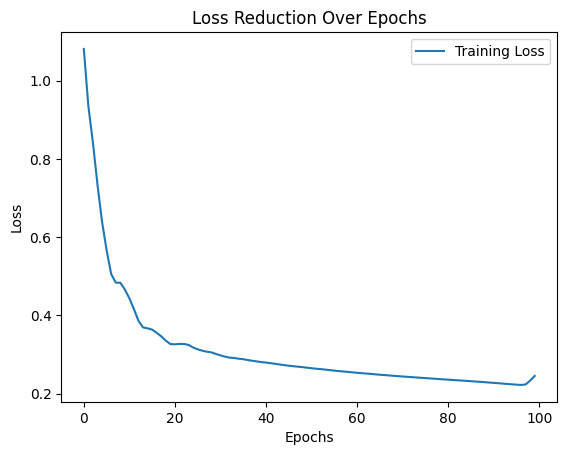

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['Price'] = housing.target


X = data.drop(columns=['Price']).values
y = data['Price'].values.reshape(-1, 1)


scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


class HousePriceModel(nn.Module):
    def __init__(self):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


model = HousePriceModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)  # Adjusted learning rate


epochs = 100
batch_size = 32
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')


model.eval()
y_pred = model(X_test_tensor).detach().numpy()
y_pred = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)
mse = np.mean((y_pred - y_test_actual) ** 2)
print(f'Test MSE: {mse:.4f}')


plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Epochs')
plt.legend()
plt.show()